## SP Lab Assignement 3: Z-Transform

Q. **Example 1**

The $z$-transform of the Dirac impulse is computed by direct evaluation of its definition. The Dirac impulse is represented by the [Kronecker delta](https://en.wikipedia.org/wiki/Kronecker_delta) $\delta[k] = \delta_{k 0}$ in `SymPy`.

#SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. 



In [2]:
import sympy as sym

k = sym.symbols('k', integer=True)
z = sym.symbols('z', complex=True)

X = sym.summation(sym.KroneckerDelta(k, 0) * z**(-k), (k, -sym.oo, sym.oo))
X

1


Q.**Example 2** 

The $z$-transform of the causal complex exponential signal $x[k] = z_0^nu(n) $ with $z_0 \in \mathbb{C}$ is computed by direct evaluation of its definition.


In [3]:
import sympy as sym
z0 = sym.symbols('z0')
n = sym.symbols('n', integer=True)
X = sym.summation(z0**n * z**(-n), (n, 0, sym.oo))
print(X)


Piecewise((1/(1 - z0/z), Abs(z0/z) < 1), (Sum(z**(-n)*z0**n, (n, 0, oo)), True))



**Q 1.** (a)The $z$-transform of the causal complex exponential signal $x[k] = z_0^nu(n-1) $ with $z_0 \in \mathbb{C}$ is computed by direct evaluation of its definition.

(b)The $z$-transform of the causal complex exponential signal $x[k] = z_0^nu(-n-1) $ with $z_0 \in \mathbb{C}$ is computed by direct evaluation of its definition.

In [4]:
#write code
import sympy as sym
z0=sym.symbols('z0')
n=sym.symbols('n', integer=True)
X1=sym.summation(z0**n * z**(-n), (n,1,sym.oo))
X1
X2=sym.summation(z0**n * z**(-n),(n,-sym.oo,-1))
X2

Piecewise((z/(z0*(-z/z0 + 1)), Abs(z/z0) < 1), (Sum(z**(-n)*z0**n, (n, -oo, -1)), True))

Q.**Example 3**

The $z$-transform of the causal complex exponential signal

\begin{equation}
X(z) = \frac{z}{z - z_0} \qquad \text{for } |z| > |z_0|
\end{equation}

derived above is illustrated by plotting its magnitude $|X(z)|$ over the $z$-plane for $z_0 = 1 + j$


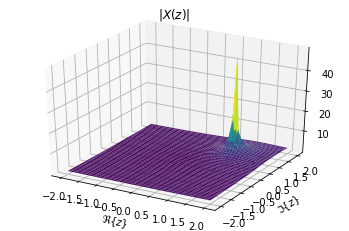

{0: 1}


AttributeError: module 'matplotlib.pyplot' has no attribute 'hold'

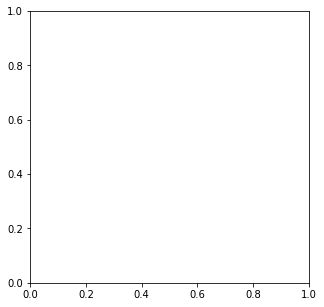

In [7]:
import sympy as sym
rez, imz = sym.symbols('rez imz', real=True)
z0=1+1j
X = z / (z - z0)
X1 = X.subs({z: rez+sym.I*imz, z0: 1+sym.I})

sym.plotting.plot3d(abs(X1), (rez, -2, 2), (imz, -2, 2),
                    xlabel=r'$\Re\{z\}$', ylabel=r'$\Im\{z\}$', title=r'$|X(z)|$');

# poles of X(z)
poles = sym.roots(sym.denom(X), z)
# Zeros of X(z)
zeros = sym.roots(sym.numer(X), z)
print(zeros)

from pole_zero_plot import pole_zero_plot
z = sym.symbols('z', complex=True)
#ploe zero plot
X2 = X.subs(z0, 1+sym.I)
pole_zero_plot(sym.roots(sym.denom(X2), z), sym.roots(sym.numer(X2), z))

**Q 2.** The $z$-transform of the causal complex exponential signal

\begin{equation}
X(z) = \frac{z}{z - z_0} \qquad \text{for } |z| > |z_0|
\end{equation}

derived above is illustrated by plotting its magnitude $|X(z)|$ over the $z$-plane for $z_0 = 2 - j$


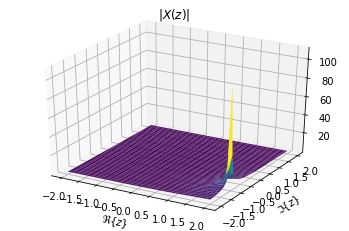

{2.0 - 1.0*I: 1}
{0: 1}


In [9]:
import sympy as sym
rez, imz = sym.symbols('rez imz', real=True)
z0=2-1j
X = z / (z - z0)
X1 = X.subs({z: rez+sym.I*imz, z0: 1+sym.I})

sym.plotting.plot3d(abs(X1), (rez, -2, 2), (imz, -2, 2),
                    xlabel=r'$\Re\{z\}$', ylabel=r'$\Im\{z\}$', title=r'$|X(z)|$');

# poles of X(z)
poles = sym.roots(sym.denom(X), z)
print(poles)
# Zeros of X(z)
zeros = sym.roots(sym.numer(X), z)
print(zeros)


**Q 3.**  Plot the pole zero locations and time domain impulse response (clearly mark the point n=0 ) for the following transfer functions. Assume all signals are causal. 
<ol>
  <li>$ \frac{1}{1+az^{-1}} \,\, for \,\, a = \pm{0.8},\pm{1},\pm{2}$ (Single pole)  </li>
 <li>$ \frac{1}{(1+az^{-1})^2} \,\, for \,\, a = \pm{0.8},\pm{1},\pm{2}$ (Single pole)  </li>
  <li>$\frac{1}{1-az^{-1}+{(az^{-1})}^2} \,\, for \,\, a = \pm{0.8},\pm{1},\pm{2}$ (Complex conjugate poles) </li>    
</ol>
Which of the responses corresponds to stable LTI systems?

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.tf2zpk.html

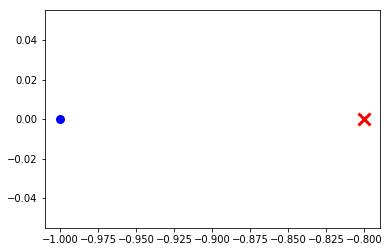

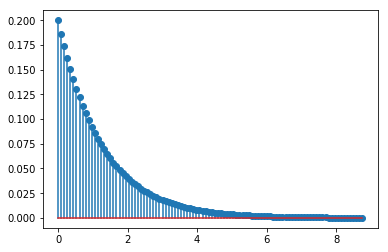

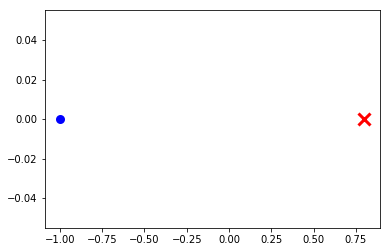

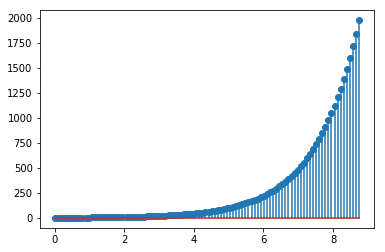

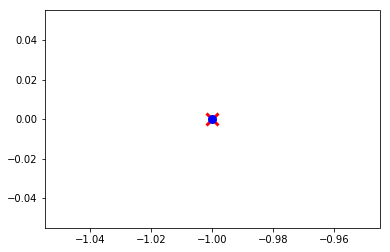

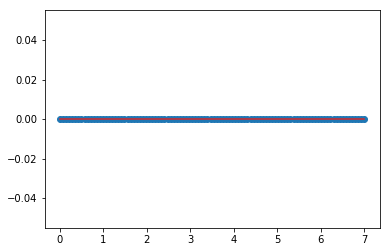

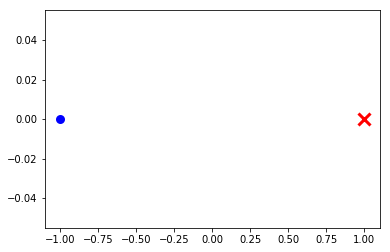

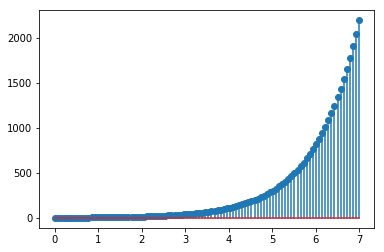

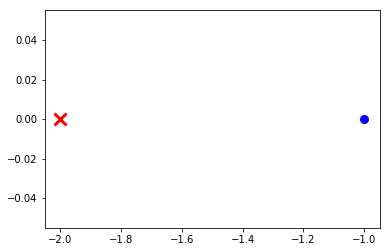

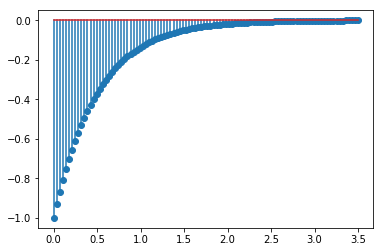

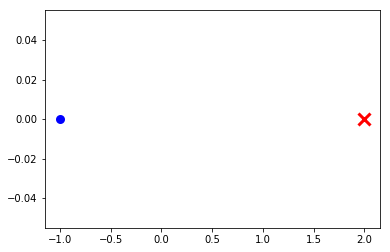

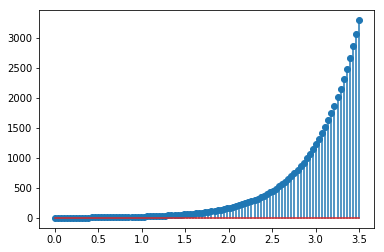

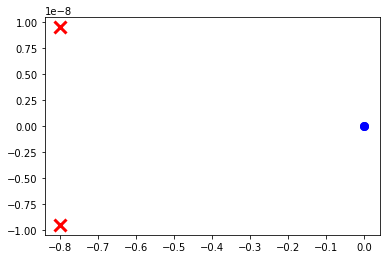

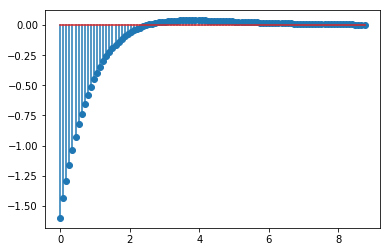

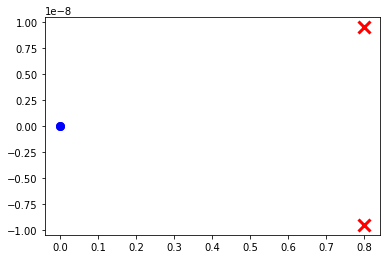

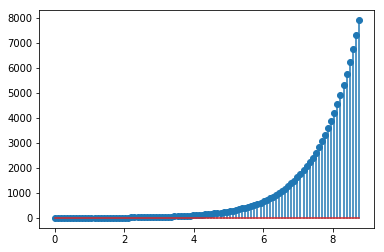

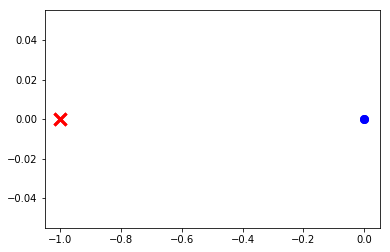

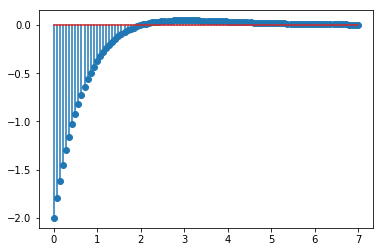

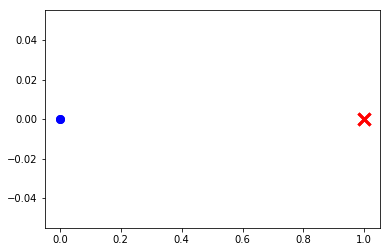

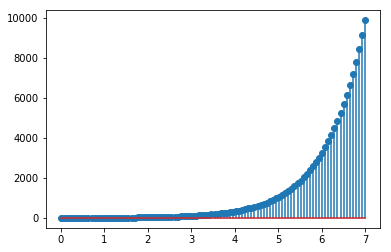

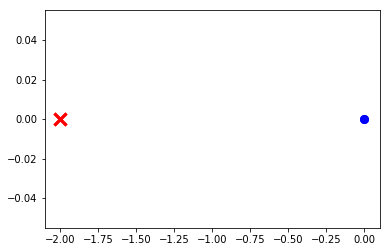

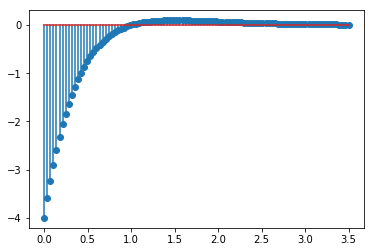

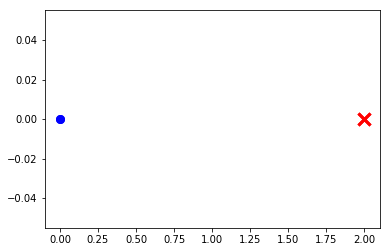

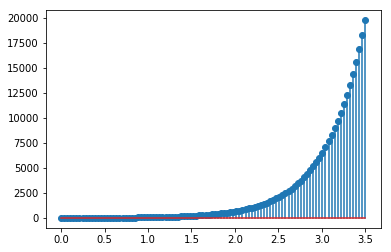

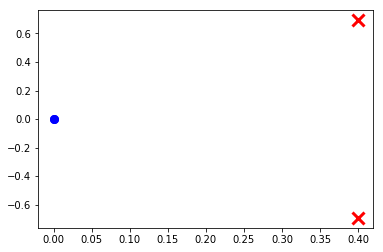

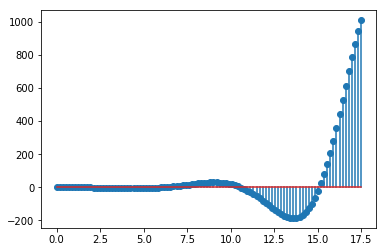

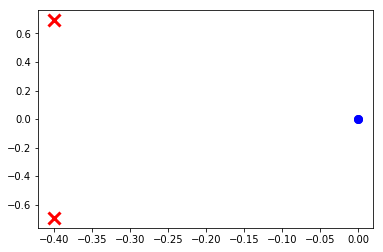

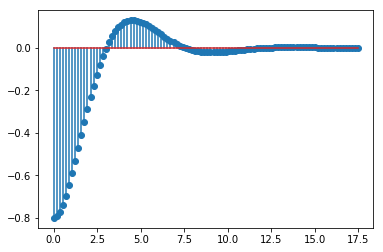

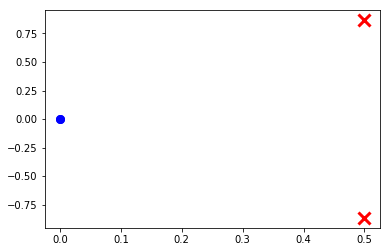

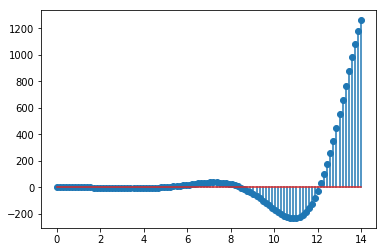

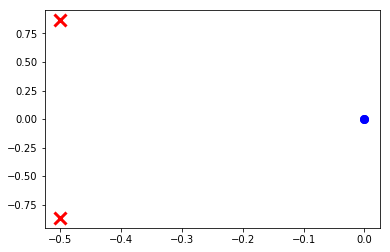

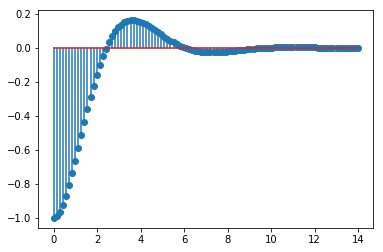

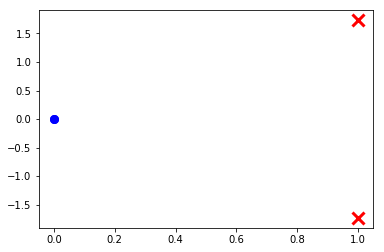

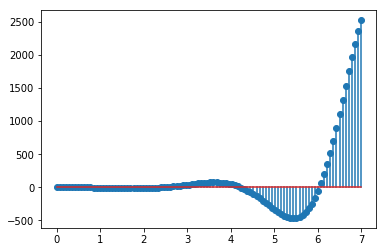

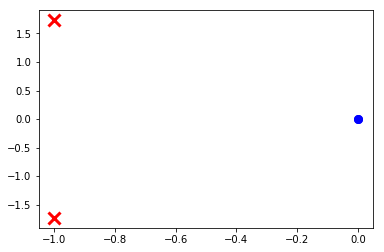

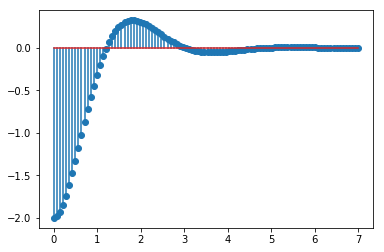

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from zp import zplane

def plot_zeros_poles(b,a):
    [z,p,k] = sig.tf2zpk(b,a)
    t3 = plt.plot(p.real, p.imag, 'rx')
    t4 = plt.plot(z.real, z.imag, 'b.')
    plt.setp(t3, markersize=12.0, markeredgewidth=3.0)
    plt.setp(t4, markersize=12.0, markeredgewidth=3.0)
    plt.show()

b = [1,1]
a = [1,0.8]
plot_zeros_poles(b,a)
t1, h1 =  sig.impulse((b,a))
plt.stem(t1,h1)
plt.show()
b = [1,1]
a = [1,-0.8]
plot_zeros_poles(b,a)
t1, h1 =  sig.impulse((b,a))
plt.stem(t1,h1)
plt.show()

b = [1,1]
a = [1,1]
plot_zeros_poles(b,a)
t1, h1 =  sig.impulse((b,a))
plt.stem(t1,h1)
plt.show()
b = [1,1]
a = [1,-1]
plot_zeros_poles(b,a)
t1, h1 =  sig.impulse((b,a))
plt.stem(t1,h1)
plt.show()

b = [1,1]
a = [1,2]
plot_zeros_poles(b,a)
t1, h1 =  sig.impulse((b,a))
plt.stem(t1,h1)
plt.show()
b = [1,1]
a = [1,-2]
plot_zeros_poles(b,a)
t1, h1 =  sig.impulse((b,a))
plt.stem(t1,h1)
plt.show()

b = [1,0,0]
a = [1,1.6,0.64]
plot_zeros_poles(b,a)
t1, h1 =  sig.impulse((b,a))
plt.stem(t1,h1)
plt.show()
b = [1,0,0]
a = [1,-1.6,0.64]
plot_zeros_poles(b,a)
t1, h1 =  sig.impulse((b,a))
plt.stem(t1,h1)
plt.show()

b = [1,0,0]
a = [1,2,1]
plot_zeros_poles(b,a)
t1, h1 =  sig.impulse((b,a))
plt.stem(t1,h1)
plt.show()
b = [1,0,0]
a = [1,-2,1]
plot_zeros_poles(b,a)
t1, h1 =  sig.impulse((b,a))
plt.stem(t1,h1)
plt.show()

b = [1,0,0]
a = [1,4,4]
plot_zeros_poles(b,a)
t1, h1 =  sig.impulse((b,a))
plt.stem(t1,h1)
plt.show()
b = [1,0,0]
a = [1,-4,4]
plot_zeros_poles(b,a)
t1, h1 =  sig.impulse((b,a))
plt.stem(t1,h1)
plt.show()

b = [1,0,0]
a = [1,-.8,.64]
plot_zeros_poles(b,a)
t1, h1 =  sig.impulse((b,a))
plt.stem(t1,h1)
plt.show()
b = [1,0,0]
a = [1,0.8,.64]
plot_zeros_poles(b,a)
t1, h1 =  sig.impulse((b,a))
plt.stem(t1,h1)
plt.show()

b = [1,0,0]
a = [1,-1,1]
plot_zeros_poles(b,a)
t1, h1 =  sig.impulse((b,a))
plt.stem(t1,h1)
plt.show()
b = [1,0,0]
a = [1,1,1]
plot_zeros_poles(b,a)
t1, h1 =  sig.impulse((b,a))
plt.stem(t1,h1)
plt.show()

b = [1,0,0]
a = [1,-2,4]
plot_zeros_poles(b,a)
t1, h1 =  sig.impulse((b,a))
plt.stem(t1,h1)
plt.show()
b = [1,0,0]
a = [1,2,4]
plot_zeros_poles(b,a)
t1, h1 =  sig.impulse((b,a))
plt.stem(t1,h1)
plt.show()




**Q 4.** 
Plot the pole zero locations of the following finite impulse response functions. 
<ol>
  <li>$ z + 2 + z^{-1}$ </li>
  <li>$ 1 + 2z^{-1} + 3z^{-2} + 2z^{-3} + z^{-4}$ </li>
  <li>$ 1 + 2z^{-1} - 2z^{-3} - z^{-4} $ </li>
   <li>$ 1 + 2z^{-1} + 3z^{-2} + 4z^{-3} + 5z^{-4} $ </li>    
</ol>


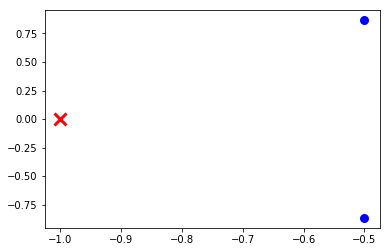

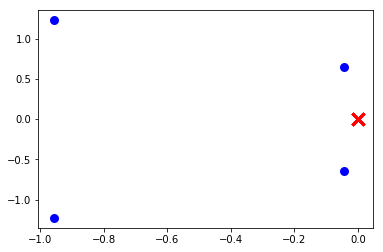

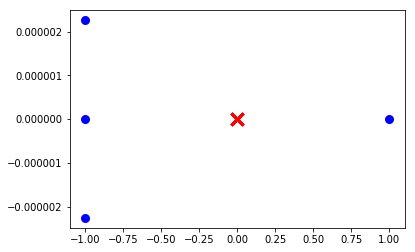

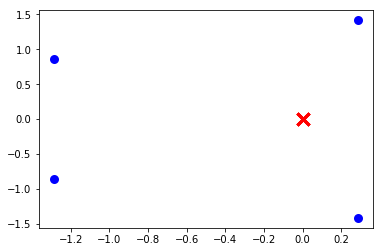

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

def plot_zeros_poles(b,a):
    [z,p,k] = sig.tf2zpk(b,a)
    t3 = plt.plot(p.real, p.imag, 'rx')
    t4 = plt.plot(z.real, z.imag, 'b.')
    plt.setp(t3, markersize=12.0, markeredgewidth=3.0)
    plt.setp(t4, markersize=12.0, markeredgewidth=3.0)
    plt.show()
    
b = [1,1,1]
a = [1,1]
plot_zeros_poles(b,a)
# t1, h1 =  sig.impulse((b,a))
# plt.stem(t1,h1)
# plt.show()

b = [1,2,3,1,1]
a = [1,0,0,0,0]
plot_zeros_poles(b,a)
# t1, h1 =  sig.impulse((b,a))
# plt.stem(t1,h1)
# plt.show()

b = [1,2,0,-2,-1]
a = [1,0,0,0,0]
plot_zeros_poles(b,a)
# t1, h1 =  sig.impulse((b,a))
# plt.stem(t1,h1)
# plt.show()

b = [1,2,3,4,5]
a = [1,0,0,0,0]
plot_zeros_poles(b,a)
# t1, h1 =  sig.impulse((b,a))
# plt.stem(t1,h1)
# plt.show()







**Q 5.** Solve the system with difference equation $y[n] - 0.5y[n - 1] = x[n]-0.5x[n - 1]$ with the initial condition is given by $y[-1] = 1$. Plot the output sequence for input 
x[n] = u[n]. Repeat the experiment
with zero initial conditions.

[0.]


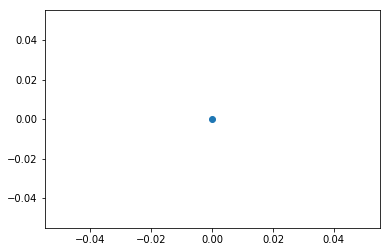

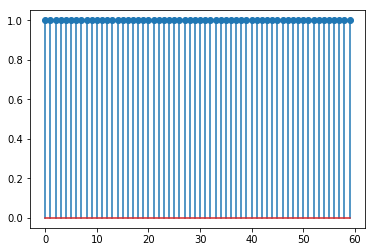

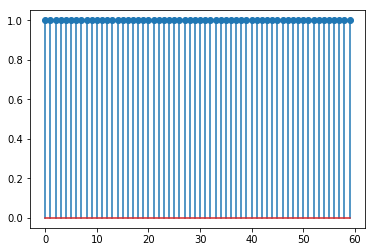

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

b=[1, -0.5]
a=[1, -0.5]
xa=np.ones(60)
zi=sig.lfiltic(b, a, [-1], [-1])
print(zi)
plt.stem(zi)
plt.show()

y, z = sig.lfilter(b,a,xa,-1,zi)
plt.stem(y)
plt.show()

y1=sig.lfilter(b,a,xa)
plt.stem(y1)
plt.show()



**Q 6.** Solve the system with difference equation $y[n] - 0.8y[n - 1] = 0.5(x[n] + x[n - 1])$ with the initial condition is given by $y[-1] = -2$. Plot the output sequence for input 
$~~ (a)~ x[n] = u[n] - u[n - 40] $ and  $~~ (b)~ x[n] = 2(u[n] - u[n - 40])$. Could the system be linear? Repeat the experiment
with zero initial conditions.

[-2.1]


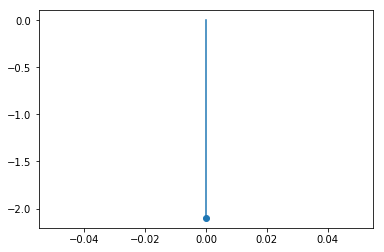

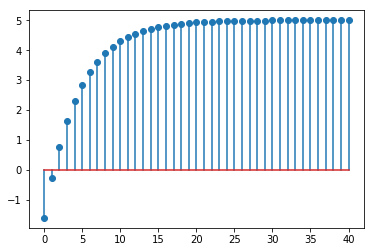

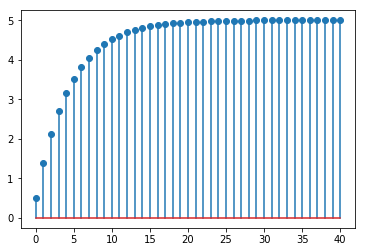

Not a linear system


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

b=[0.5, 0.5]
a=[1, -0.8]
xa=np.ones(41)
zi=sig.lfiltic(b, a, [-2], [-1])
print(zi)
plt.stem(zi)
plt.show()

y, z = sig.lfilter(b,a,xa,-1,zi)
plt.stem(y)
plt.show()

y1=sig.lfilter(b,a,xa)
plt.stem(y1)
plt.show()
print('Not a linear system')

[-2.1]


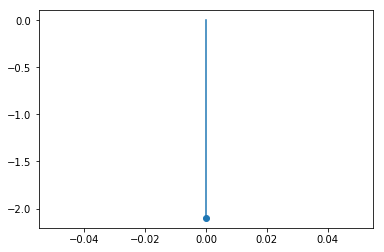

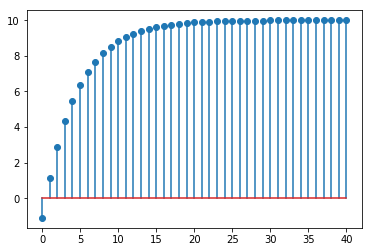

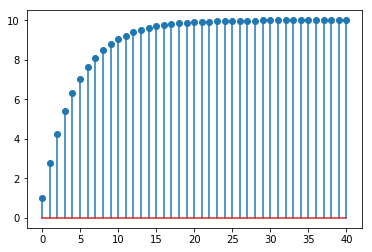

Not a linear system


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

b=[0.5, 0.5]
a=[1, -0.8]
xa=2*np.ones(41)
zi=sig.lfiltic(b, a, [-2], [-1])
print(zi)
plt.stem(zi)
plt.show()

y, z = sig.lfilter(b,a,xa,-1,zi)
plt.stem(y)
plt.show()

y1=sig.lfilter(b,a,xa)
plt.stem(y1)
plt.show()
print('Not a linear system')


**Q 7.** Compute the causal inverse of the following system functions (use <i>scipy.signal.residuez</i>).Is the system stable?
$1.H(z) = \frac{z^{-1}+0.5z^{-2}}{1-0.6z^{-1}+2z^{-2}}$.

$2.H(z) = \frac{-4+8z^{-1}}{1+6z^{-1}+8z^{-2}}$.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.residuez.html

(0.5-0.28942984211696865j)


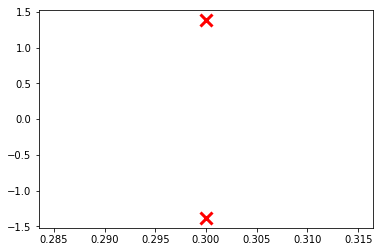

[0.5-0.28942984j 0.5+0.28942984j] [0.3+1.3820275j 0.3-1.3820275j]


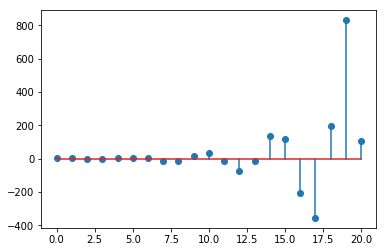

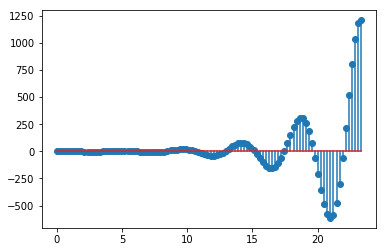

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

b = [1, 0.5]
a = [1,-0.6,2]
[r1,p1,k1] = sig.residuez(b,a)
print(r1[0])
t3 = plt.plot(p1.real, p1.imag, 'rx')
plt.setp(t3, markersize=12.0, markeredgewidth=3.0)
plt.show()
print(r1,p1)
n = np.arange(0,21)
h = r1[0]*np.power(p1[0],n) + r1[1]*np.power(p1[1],n)
plt.stem(h)
plt.show()

t1, h1 =  sig.impulse((b,a))
plt.stem(t1,h1)
plt.show()